Accuracy: 0.40
Precision: 0.47
Recall: 0.64

Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.11      0.14         9
           1       0.47      0.64      0.54        11

    accuracy                           0.40        20
   macro avg       0.33      0.37      0.34        20
weighted avg       0.35      0.40      0.36        20



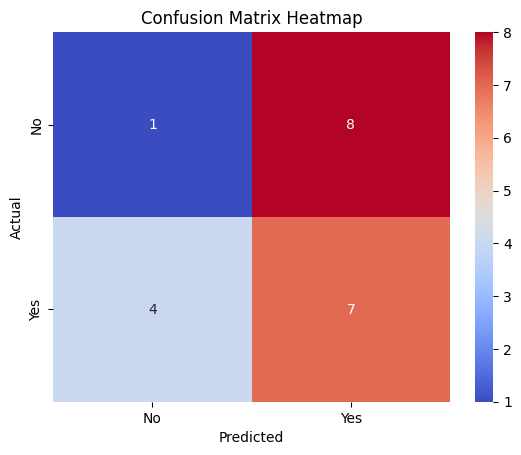

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

# Load dataset (adjusted to reflect your uploaded structure)
data = pd.read_csv("/content/product_return.csv")

# Rename columns if needed (e.g., if they contain typos or extra underscores)
data.columns = ["purchaseAmount", "reviewScore", "daysToDelivery", "returned"]

# Convert target to numeric
data["returned"] = data["returned"].map({"yes": 1, "no": 0})

# Features and target
features = data[["purchaseAmount", "reviewScore", "daysToDelivery"]]
target = data["returned"]

# Train-test split
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(trainX, trainY)

# Predictions
predictions = model.predict(testX)

# Metrics
accuracy = accuracy_score(testY, predictions)
precision = precision_score(testY, predictions)
recall = recall_score(testY, predictions)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nClassification Report:\n", classification_report(testY, predictions))

# Confusion matrix
matrix = confusion_matrix(testY, predictions)
sns.heatmap(matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
